#Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

100%|██████████| 43.3M/43.3M [00:00<00:00, 57.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1


In [3]:
import os

print(os.listdir(path))

['online_retail_II.xlsx']


In [4]:
# the full path to the excel file
# extracted_path = '/root/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1' # This path is incorrect
excel_file_path = os.path.join(path, 'online_retail_II.xlsx') # Use the 'path' variable from the download step

# Load the excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  

[525461 rows x 8 columns]

#Clean the data

## Checking missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
miss_prc=((df.isna().sum()/len(df))*100).sort_values(ascending=False)
display(miss_prc)

Customer ID    20.539488
Description     0.557225
StockCode       0.000000
Invoice         0.000000
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Country         0.000000
dtype: float64

In [8]:
df.dropna(subset=['Customer ID','Description'], inplace=True)


*   Drop the missing values, because we still have a lot of data.



* recheck the null values

In [9]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

##Check the outliers

In [10]:
df.describe()

Quantity                    InvoiceDate          Price  \
count  417534.000000                         417534  417534.000000   
mean       12.758815  2010-07-01 01:12:19.787609856       3.887547   
min     -9360.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 11:26:00       1.250000   
50%         4.000000            2010-07-08 19:12:00       1.950000   
75%        12.000000            2010-10-14 14:08:00       3.750000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       101.220424                            NaN      71.131797   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

There is abnormal data on quantity, where the min value is up to -9600 and the max value is 19,152. There is data with a minus value in the Price column and the max price is very high. We need to check further

In [11]:
display(df[df['Quantity'] == -9360])

Invoice StockCode                          Description  Quantity  \
507225  C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   

               InvoiceDate  Price  Customer ID         Country  
507225 2010-12-02 14:23:00   0.03      15838.0  United Kingdom

In [12]:
display(df[df['Quantity'] == 19152])

Invoice StockCode                         Description  Quantity  \
90857  497946     37410  BLACK AND WHITE PAISLEY FLOWER MUG     19152   

              InvoiceDate  Price  Customer ID  Country  
90857 2010-02-15 11:57:00    0.1      13902.0  Denmark

In [13]:
display(df[df['Quantity'] < 0])

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
524695  C538123     22956          36 FOIL HEART CAKE CASES        -2   
524696  C538124         M                            Manual        -4   
524697  C538124     22699  ROSES REGENCY TEACUP AND SAUCER         -1   
524698  C538124     22423          REGENCY CAKESTAND 3 TIER        -1   
525282  C538164    35004B       SET OF 3 BLACK FLYING DUCKS        -1   

               InvoiceDate  Price  Customer ID         Country  
178    2009-12-01 10:33:00   2.95      16321.0       Australia  
179    2009-12-01 10:33:00   1.65      16321.0       Australia  
180    2009-12-01 10:33:00   4.25      16321.0       Australia  
181    2009-12-01 10:33:00   2.10      16321.0       Australia  
182    2009-12-01 10:33:00   2.95      16321.0       Australia  
...                    ...    ...          ...             ...  
524695 2010-12-09 15:41:00   2.10      12605.0         Germany  
524696 2010-12-09 15:43:00   0.50      15329.0  United Kingdom  
524697 2010-12-09 15:43:00   2.95      15329.0  United Kingdom  
524698 2010-12-09 15:43:00  12.75      15329.0  United Kingdom  
525282 2010-12-09 17:32:00   1.95      14031.0  United Kingdom  

[9839 rows x 8 columns]

In [14]:
df[df['Invoice'] == 'C489449']

Invoice StockCode                        Description  Quantity  \
178  C489449     22087           PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A       CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895      POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896                 POTTING SHED TWINE        -6   
182  C489449     22083         PAPER CHAIN KIT RETRO SPOT       -12   
183  C489449     21871                SAVE THE PLANET MUG       -12   
184  C489449     84946    ANTIQUE SILVER TEA GLASS ETCHED       -12   
185  C489449    84970S  HANGING HEART ZINC T-LIGHT HOLDER       -24   
186  C489449     22090          PAPER BUNTING RETRO SPOTS       -12   

            InvoiceDate  Price  Customer ID    Country  
178 2009-12-01 10:33:00   2.95      16321.0  Australia  
179 2009-12-01 10:33:00   1.65      16321.0  Australia  
180 2009-12-01 10:33:00   4.25      16321.0  Australia  
181 2009-12-01 10:33:00   2.10      16321.0  Australia  
182 2009-12-01 10:33:00   2.95      16321.0  Australia  
183 2009-12-01 10:33:00   1.25      16321.0  Australia  
184 2009-12-01 10:33:00   1.25      16321.0  Australia  
185 2009-12-01 10:33:00   0.85      16321.0  Australia  
186 2009-12-01 10:33:00   2.95      16321.0  Australia

In [15]:
display(df[df['Price'] == 0])

Invoice StockCode                        Description  Quantity  \
4674    489825     22076                 6 RIBBONS EMPIRE          12   
6781    489998     48185                DOOR MAT FAIRY CAKE         2   
16107   490727         M                             Manual         1   
18738   490961     22065     CHRISTMAS PUDDING TRINKET POT          1   
18739   490961     22142       CHRISTMAS CRAFT WHITE FAIRY         12   
32916   492079     85042          ANTIQUE LILY FAIRY LIGHTS         8   
40101   492760     21143    ANTIQUE GLASS HEART DECORATION         12   
47126   493761     79320                    FLAMINGO LIGHTS        24   
48342   493899     22355        CHARLOTTE BAG , SUKI DESIGN        10   
57619   494607     21533          RETRO SPOT LARGE MILK JUG        12   
89084   497819   TEST001            This is a test product.         5   
89180   497843   TEST001            This is a test product.         5   
111348  500073     21662         VINTAGE GLASS COFFEE CADDY         1   
149201  503585     22459       CAST IRON HOOK GARDEN TROWEL         8   
149202  503585     22458         CAST IRON HOOK GARDEN FORK         8   
166143  505083     22376  AIRLINE BAG VINTAGE JET SET WHITE         1   
232526  511902     21765            HANGING METAL BIRD BATH         1   
240455  512609     20914   SET/5 RED SPOTTY LID GLASS BOWLS         2   
248583  513416     22423           REGENCY CAKESTAND 3 TIER         5   
276858  516304     22690      DOORMAT HOME SWEET HOME BLUE          6   
296375  518231     22472          TV DINNER TRAY DOLLY GIRL         9   
327801  521375     22202            MILK PAN PINK RETROSPOT         3   
358820  524181    46000M       POLYESTER FILLER PAD 45x45cm       648   
364333  524701     22218              CAKE STAND LACE WHITE         2   
392008  527084     22630               DOLLY GIRL LUNCH BOX        64   
400047  527696     22121         NOEL WOODEN BLOCK LETTERS          1   
439309  531361     21843           RED RETROSPOT CAKE STAND         2   
453705  532470     22624               IVORY KITCHEN SCALES         2   
471775  533822     22846         BREAD BIN DINER STYLE RED          1   
471776  533822     22845   VINTAGE CREAM CAT FOOD CONTAINER         1   
512240  537197     22841       ROUND CAKE TIN VINTAGE GREEN         1   

               InvoiceDate  Price  Customer ID         Country  
4674   2009-12-02 13:34:00    0.0      16126.0  United Kingdom  
6781   2009-12-03 11:19:00    0.0      15658.0  United Kingdom  
16107  2009-12-07 16:38:00    0.0      17231.0  United Kingdom  
18738  2009-12-08 15:25:00    0.0      14108.0  United Kingdom  
18739  2009-12-08 15:25:00    0.0      14108.0  United Kingdom  
32916  2009-12-15 13:49:00    0.0      15070.0  United Kingdom  
40101  2009-12-18 14:22:00    0.0      18071.0  United Kingdom  
47126  2010-01-06 14:54:00    0.0      14258.0  United Kingdom  
48342  2010-01-08 10:43:00    0.0      12417.0         Belgium  
57619  2010-01-15 12:43:00    0.0      16858.0  United Kingdom  
89084  2010-02-12 14:58:00    0.0      14103.0  United Kingdom  
89180  2010-02-12 15:47:00    0.0      14827.0  United Kingdom  
111348 2010-03-04 11:44:00    0.0      13047.0  United Kingdom  
149201 2010-04-01 17:13:00    0.0      13047.0  United Kingdom  
149202 2010-04-01 17:13:00    0.0      13047.0  United Kingdom  
166143 2010-04-20 09:56:00    0.0      12623.0         Germany  
232526 2010-06-11 11:12:00    0.0      12748.0  United Kingdom  
240455 2010-06-17 10:12:00    0.0      14045.0  United Kingdom  
248583 2010-06-24 12:34:00    0.0      13089.0  United Kingdom  
276858 2010-07-19 13:13:00    0.0      14025.0  United Kingdom  
296375 2010-08-05 15:28:00    0.0      12471.0         Germany  
327801 2010-09-05 11:58:00    0.0      12647.0         Germany  
358820 2010-09-27 16:59:00    0.0      17450.0  United Kingdom  
364333 2010-09-30 12:19:00    0.0      17667.0  United Kingdom  
392008 2010-10-14 15:33:00    0.0      14646.

In [16]:
display(df[df['Price'] == 25111.09])

Invoice StockCode Description  Quantity         InvoiceDate     Price  \
241824  C512770         M      Manual        -1 2010-06-17 16:52:00  25111.09   

        Customer ID         Country  
241824      17399.0  United Kingdom

In [17]:
display(df[df['Price'] >=1000])

Invoice StockCode Description  Quantity         InvoiceDate    Price  \
9307    C490129         M      Manual        -1 2009-12-03 18:26:00  1998.49   
22960    491176         M      Manual         1 2009-12-10 11:50:00  1213.02   
65448   C495234         M      Manual        -1 2010-01-22 09:39:00  1193.89   
65449    495235         M      Manual         1 2010-01-22 09:40:00  1193.89   
74356    496115         M      Manual         1 2010-01-29 11:04:00  8985.60   
...         ...       ...         ...       ...                 ...      ...   
418866  C529353         M      Manual        -1 2010-10-28 09:41:00  2736.16   
418885  C529354         M      Manual        -1 2010-10-28 09:43:00  1155.60   
418886   529356         M      Manual         1 2010-10-28 09:44:00  2736.16   
418887   529357         M      Manual         1 2010-10-28 09:45:00  1155.60   
450818  C532255         D    Discount        -1 2010-11-11 12:50:00  1269.51   

        Customer ID         Country  
9307        15482.0  United Kingdom  
22960       13091.0  United Kingdom  
65448       14156.0            EIRE  
65449       14156.0            EIRE  
74356       17949.0  United Kingdom  
...             ...             ...  
418866      14156.0            EIRE  
418885      14156.0            EIRE  
418886      14156.0            EIRE  
418887      14156.0            EIRE  
450818      14088.0  United Kingdom  

[65 rows x 8 columns]

In [18]:
df[df['StockCode'] == 'M']

Invoice StockCode Description  Quantity         InvoiceDate    Price  \
3053    C489651         M      Manual        -1 2009-12-01 16:48:00     5.10   
9259    C490126         M      Manual        -1 2009-12-03 18:12:00     5.95   
9307    C490129         M      Manual        -1 2009-12-03 18:26:00  1998.49   
11310    490300         M      Manual         1 2009-12-04 14:19:00     0.85   
11311    490300         M      Manual         1 2009-12-04 14:19:00     0.21   
...         ...       ...         ...       ...                 ...      ...   
521074   537800         M      Manual        12 2010-12-08 13:08:00     0.19   
521122   537804         M      Manual        12 2010-12-08 13:17:00     2.95   
521124   537804         M      Manual        12 2010-12-08 13:17:00     0.19   
524696  C538124         M      Manual        -4 2010-12-09 15:43:00     0.50   
524776   538147         M      Manual         1 2010-12-09 16:11:00    15.00   

        Customer ID         Country  
3053        17804.0  United Kingdom  
9259        15884.0  United Kingdom  
9307        15482.0  United Kingdom  
11310       12970.0  United Kingdom  
11311       12970.0  United Kingdom  
...             ...             ...  
521074      12748.0  United Kingdom  
521122      12748.0  United Kingdom  
521124      12748.0  United Kingdom  
524696      15329.0  United Kingdom  
524776      13090.0  United Kingdom  

[650 rows x 8 columns]

In [19]:
df[df['Customer ID'] == 15299.0]

Invoice StockCode                       Description  Quantity  \
735     C489535         D                          Discount        -1   
736     C489535         D                          Discount        -1   
52638    494210    84856S            SMALL TAHITI BEACH BAG       192   
367054   524971     22112        CHOCOLATE HOT WATER BOTTLE       144   
464418   533254     22112        CHOCOLATE HOT WATER BOTTLE        72   
507788   536809     84950    ASSORTED COLOUR T-LIGHT HOLDER      1824   
507789   536810     21833              CAMOUFLAGE LED TORCH       204   
507790   536811     22275  WEEKEND BAG VINTAGE ROSE PAISLEY        69   

               InvoiceDate  Price  Customer ID         Country  
735    2009-12-01 12:11:00   9.00      15299.0  United Kingdom  
736    2009-12-01 12:11:00  19.00      15299.0  United Kingdom  
52638  2010-01-12 11:34:00   3.81      15299.0  United Kingdom  
367054 2010-10-01 14:55:00   4.25      15299.0  United Kingdom  
464418 2010-11-16 15:11:00   4.25      15299.0  United Kingdom  
507788 2010-12-02 16:48:00   0.55      15299.0  United Kingdom  
507789 2010-12-02 16:50:00   1.49      15299.0  United Kingdom  
507790 2010-12-02 16:51:00   7.65      15299.0  United Kingdom

In [20]:
df[df['Customer ID'] == 12970.0]

Invoice StockCode                      Description  Quantity  \
11293   490300     21929   JUMBO BAG PINK VINTAGE PAISLEY         1   
11294   490300     21726           MULTI HEARTS  STICKERS         1   
11295   490300     21726           MULTI HEARTS  STICKERS         1   
11296   490300     21726           MULTI HEARTS  STICKERS         1   
11297   490300     21725               SWEETIES  STICKERS         1   
...        ...       ...                              ...       ...   
485994  534822     22384          LUNCH BAG PINK POLKADOT         1   
485995  534822     22968       ROSE COTTAGE KEEPSAKE BOX          2   
486089  534835     21033  JUMBO BAG CHARLIE AND LOLA TOYS         1   
486090  534835     21929   JUMBO BAG PINK VINTAGE PAISLEY         2   
486091  534835     21928   JUMBO BAG SCANDINAVIAN PAISLEY         2   

               InvoiceDate  Price  Customer ID         Country  
11293  2009-12-04 14:19:00   1.95      12970.0  United Kingdom  
11294  2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11295  2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11296  2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
11297  2009-12-04 14:19:00   0.85      12970.0  United Kingdom  
...                    ...    ...          ...             ...  
485994 2010-11-24 12:54:00   1.65      12970.0  United Kingdom  
485995 2010-11-24 12:54:00   9.95      12970.0  United Kingdom  
486089 2010-11-24 13:08:00   2.95      12970.0  United Kingdom  
486090 2010-11-24 13:08:00   1.95      12970.0  United Kingdom  
486091 2010-11-24 13:08:00   1.95      12970.0  United Kingdom  

[232 rows x 8 columns]

In [21]:
df[df['StockCode'] == 'D']

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
735     C489535         D    Discount        -1 2009-12-01 12:11:00    9.00   
736     C489535         D    Discount        -1 2009-12-01 12:11:00   19.00   
24675   C491428         D    Discount        -1 2009-12-10 20:23:00    9.10   
29958   C491962         D    Discount        -1 2009-12-14 16:38:00    0.59   
39127   C492693         D    Discount        -1 2009-12-17 18:47:00    6.85   
...         ...       ...         ...       ...                 ...     ...   
501237   536158         D    Discount         1 2010-11-30 11:57:00   32.29   
503073  C536379         D    Discount        -1 2010-12-01 09:41:00   27.50   
511955  C537164         D    Discount        -1 2010-12-05 13:21:00   29.29   
517436  C537597         D    Discount        -1 2010-12-07 12:34:00  281.00   
522330  C537857         D    Discount        -1 2010-12-08 16:00:00  267.12   

        Customer ID         Country  
735         15299.0  United Kingdom  
736         15299.0  United Kingdom  
24675       15494.0  United Kingdom  
29958       13206.0  United Kingdom  
39127       13408.0  United Kingdom  
...             ...             ...  
501237      13634.0  United Kingdom  
503073      14527.0  United Kingdom  
511955      14527.0  United Kingdom  
517436      15498.0  United Kingdom  
522330      17340.0  United Kingdom  

[97 rows x 8 columns]

In [22]:
df[df['StockCode'] == 'POST']

Invoice StockCode Description  Quantity         InvoiceDate   Price  \
89       489439      POST     POSTAGE         3 2009-12-01 09:28:00   18.00   
126      489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.00   
173      489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.00   
625      489526      POST     POSTAGE         6 2009-12-01 11:50:00   18.00   
927     C489538      POST     POSTAGE        -1 2009-12-01 12:18:00    9.58   
...         ...       ...         ...       ...                 ...     ...   
522916   537967      POST     POSTAGE         1 2010-12-09 11:31:00   18.00   
522930   537995      POST     POSTAGE         2 2010-12-09 11:39:00   18.00   
522974   538003      POST     POSTAGE         8 2010-12-09 12:05:00   18.00   
523064   538008      POST     POSTAGE         5 2010-12-09 12:17:00   18.00   
524491   538093      POST     POSTAGE         5 2010-12-09 14:49:00   18.00   

        Customer ID         Country  
89          12682.0          France  
126         12636.0             USA  
173         12362.0         Belgium  
625         12533.0         Germany  
927         15796.0  United Kingdom  
...             ...             ...  
522916      12494.0          France  
522930      12712.0         Germany  
522974      12429.0         Denmark  
523064      12683.0          France  
524491      12682.0          France  

[822 rows x 8 columns]

In [23]:
# stockcode that not begin with number
non_product_codes = df[df['StockCode'].str.contains('^[a-zA-Z]', na=False)]['StockCode'].unique()
print(non_product_codes)

['POST' 'D' 'M' 'C2' 'BANK CHARGES' 'TEST001' 'TEST002' 'PADS' 'ADJUST'
 'ADJUST2' 'SP1002']


Quantity with the value less than 0 means the order got cancelled. Price with the value equal to 0 means "free sample". We will remove the Stockcode with values are equal to 'M', 'D', 'TEST 001', 'POST', 'BANK CHARGES', and many more. Because we don't need it in apriori algorithm later. And we just need to know the correlation in each product.

Text(0, 0.5, 'Value')

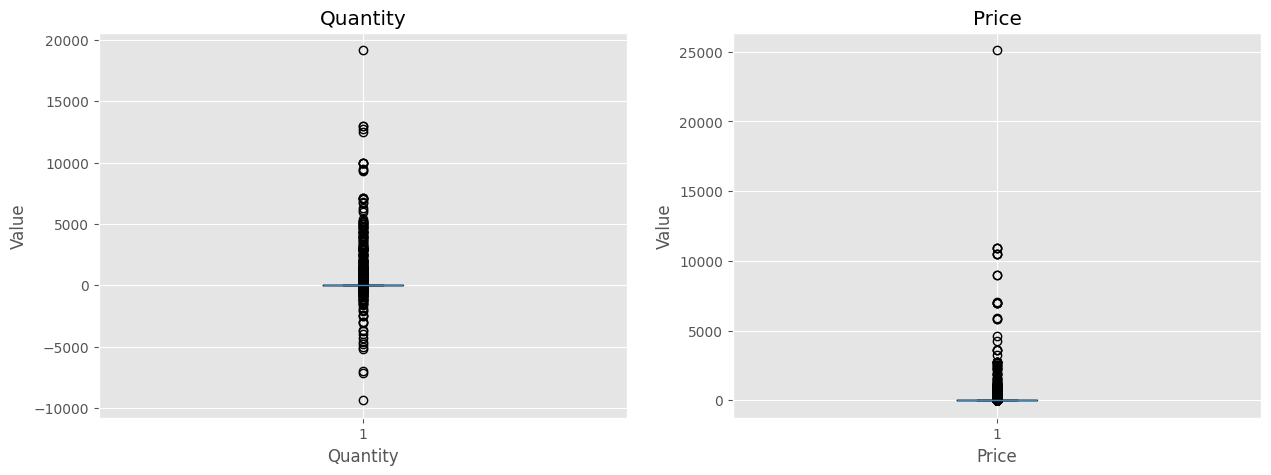

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plots Boxplot for Data 1
axs[0].boxplot(df['Quantity'])
axs[0].set_title('Quantity')
axs[0].set_xlabel('Quantity')
axs[0].set_ylabel('Value')
# Plots Boxplot for Data 2
axs[1].boxplot(df['Price'])
axs[1].set_title('Price')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Value')

##Checking duplicated data

In [25]:
df.duplicated().sum()

np.int64(6771)

In [26]:
df[df['Invoice'] == 489517]

Invoice StockCode                          Description  Quantity  \
361  489517     21705              BAG 500g SWIRLY MARBLES         1   
362  489517     21913       VINTAGE SEASIDE JIGSAW PUZZLES         1   
363  489517     21912             VINTAGE SNAKES & LADDERS         1   
364  489517    16207A             PINK STRAWBERRY HANDBAG          2   
365  489517     21821     GLITTER STAR GARLAND WITH BELLS          1   
366  489517    85123A   WHITE HANGING HEART T-LIGHT HOLDER         1   
367  489517     22319    HAIRCLIPS FORTIES FABRIC ASSORTED        12   
368  489517     22130     PARTY CONE CHRISTMAS DECORATION          6   
369  489517     21584        RETRO SPOT SMALL TUBE MATCHES        20   
370  489517     20972   PINK CREAM FELT CRAFT TRINKET BOX          1   
371  489517     21912             VINTAGE SNAKES & LADDERS         1   
372  489517     21791   VINTAGE HEADS AND TAILS CARD GAME          6   
373  489517     21790                   VINTAGE SNAP CARDS         4   
374  489517     21931               JUMBO STORAGE BAG SUKI         1   
375  489517     20711                      JUMBO BAG TOYS          1   
376  489517    47591A           CAROUSEL DES CHILD'S APRON         1   
377  489517    84997B    RED 3 PIECE MINI DOTS CUTLERY SET        12   
378  489517    84997A  GREEN 3 PIECE MINI DOTS CUTLERY SET        12   
379  489517     21491      SET OF THREE VINTAGE GIFT WRAPS         1   
380  489517     22122       SET OF 2 FANCY FONT TEA TOWELS        12   
381  489517     20971     PINK BLUE FELT CRAFT TRINKET BOX         1   
382  489517     21252       SET OF MEADOW  FLOWER STICKERS         1   
383  489517     22130     PARTY CONE CHRISTMAS DECORATION          6   
384  489517     22319    HAIRCLIPS FORTIES FABRIC ASSORTED        12   
385  489517     21913       VINTAGE SEASIDE JIGSAW PUZZLES         1   
386  489517     21821     GLITTER STAR GARLAND WITH BELLS          1   
387  489517     21837  CROSS STITCH ALPHABET CUSHION COVER         2   
388  489517    84951A      S/4 PISTACHIO LOVEBIRD COASTERS         1   
389  489517     22335       HEART DECORATION PAINTED ZINC          1   
390  489517    84951A      S/4 PISTACHIO LOVEBIRD COASTERS         1   
391  489517     21491      SET OF THREE VINTAGE GIFT WRAPS         1   
392  489517     21791   VINTAGE HEADS AND TAILS CARD GAME          1   
393  489517     21790                   VINTAGE SNAP CARDS         1   
394  489517     21912             VINTAGE SNAKES & LADDERS         1   
395  489517    85129A      WHITE PEARL BEADED HEART, SMALL         1   
396  489517     84791             GINGHAM HEART DECORATION         1   
397  489517     21244                  BLUE  SPOTTY PLATE          4   
398  489517     20675                     BLUE SPOTTY BOWL         4   

            InvoiceDate  Price  Customer ID         Country  
361 2009-12-01 11:34:00   1.65      16329.0  United Kingdom  
362 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
363 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
364 2009-12-01 11:34:00   2.95      16329.0  United Kingdom  
365 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
366 2009-12-01 11:34:00   2.95      16329.0  United Kingdom  
367 2009-12-01 11:34:00   0.65      16329.0  United Kingdom  
368 2009-12-01 11:34:00   0.85      16329.0  United Kingdom  
369 2009-12-01 11:34:00   1.65      16329.0  United Kingdom  
370 2009-12-01 11:34:00   1.25      16329.0  United Kingdom  
371 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
372 2009-12-01 11:34:00   1.25      16329.0  United Kingdom  
373 2009-12-01 11:34:00   0.85      16329.0  United Kingdom  
374 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
375 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
376 2009-12-01 11:34:00   1.65      16329.0  United Kingdom  
377 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
378 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
379 2009-12-01 11

Some data is still partially duplicated. This is normal in e-commerce, as a single invoice can contain multiple items.

#Feature Engineering

In [31]:
def label_transaction(row):
  if row['Quantity']<0:
    return 'return'
  elif row['Price'] == 0:
    return 'free'
  else:
    return 'Sale'

#membuat kolom tipe transaksi
df['Transaction type']=df.apply(label_transaction,axis=1)

In [32]:
#membuat kolom total price
df['Total price']=df['Quantity']*df['Price']

In [33]:
#create date. month, week, time
df['date']=df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df['month']=df['InvoiceDate'].dt.strftime('%B')
df['week']=df['InvoiceDate'].dt.strftime('%A')
df['time']=df['InvoiceDate'].dt.strftime('%H')
df['year'] = df['InvoiceDate'].dt.strftime('%Y')

In [34]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country Transaction type  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom             Sale   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom             Sale   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom             Sale   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom             Sale   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom             Sale   

   Total price        date     month     week time  year  
0         83.4  2009-12-01  December  Tuesday   07  2009  
1         81.0  2009-12-01  December  Tuesday   07  2009  
2         81.0  2009-12-01  December  Tuesday   07  2009  
3        100.8  2009-12-01  December  Tuesday   07  2009  
4         30.0  2009-12-01  December  Tuesday   07  2009

date, month, week, time, year columns need to be changed into datetime dtype

#EDA

In [35]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

In [36]:
most_bought_products=df.groupby('Description').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False)[:10].reset_index()
most_bought_products

Description  Quantity
0  WHITE HANGING HEART T-LIGHT HOLDER     55861
1   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54274
2                 BROCADE RING PURSE      47430
3    PACK OF 72 RETRO SPOT CAKE CASES     44507
4       ASSORTED COLOUR BIRD ORNAMENT     44120
5         60 TEATIME FAIRY CAKE CASES     35630
6  PACK OF 60 PINK PAISLEY CAKE CASES     30888
7             JUMBO BAG RED RETROSPOT     29498
8  BLACK AND WHITE PAISLEY FLOWER MUG     25679
9                SMALL POPCORN HOLDER     25394

In [37]:
fig = px.bar(most_bought_products,
             x='Description',
             y='Quantity',
             color='Description',
             text='Quantity',
             title="Top 10 Most Frequently Purchased Products")

fig.update_layout(
    xaxis_title="Product Description",
    yaxis_title="Total Quantity Sold",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()

In [38]:
top_revenue_products=df.groupby('Description').agg({'Total price':'sum'}).sort_values(by='Total price',ascending=False).head(10).reset_index()
top_revenue_products

Description  Total price
0   WHITE HANGING HEART T-LIGHT HOLDER    148876.66
1             REGENCY CAKESTAND 3 TIER    136866.30
2        ASSORTED COLOUR BIRD ORNAMENT     69854.96
3              JUMBO BAG RED RETROSPOT     51608.40
4                              POSTAGE     45520.86
5  ROTATING SILVER ANGELS T-LIGHT HLDR     39902.10
6      PAPER CHAIN KIT 50'S CHRISTMAS      36866.45
7                        PARTY BUNTING     34998.70
8                 JUMBO BAG STRAWBERRY     33893.70
9           VINTAGE UNION JACK BUNTING     33546.96

In [39]:
fig = px.bar(top_revenue_products,
             x='Description',
             y='Total price',
             color='Description',
             title="Top 10 Products with Highest Revenue")

fig.update_layout(
    xaxis_title="Product Description",
    yaxis_title="Total Price Sold",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")

)

fig.show()

In [40]:
country=df['Country'].value_counts().head(10).reset_index()
country

Country   count
0   United Kingdom  379423
1             EIRE    8710
2          Germany    8129
3           France    5710
4      Netherlands    2769
5            Spain    1278
6      Switzerland    1187
7          Belgium    1054
8         Portugal    1024
9  Channel Islands     906

In [41]:
fig = px.bar(country,
             x='Country',
             y='count',
             color='Country',
             title="Top 10 Country")

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()

* Most of transactions are concentrated in UK. Followed with EIRE, Germany, and France.
* The massive difference between UK and other countries. This likely means there are issues, like high shipping costs or long delivery times. Which prevent for international customers to buy as much as UK customers.
* Analyze the factors that make UK customers dominance. Once we identify the key factor behind the UK's success, we can use that to improve our approach on the other countries.

In [42]:
transaction_type=df['Transaction type'].value_counts().reset_index()
transaction_type

Transaction type   count
0             Sale  407664
1           return    9839
2             free      31

In [43]:
fig = px.pie(transaction_type, values='count', names='Transaction type', title='Transaction type', hole=0.6)
fig.show()

*   The amount of transaction type "Sale" is higher than "Return". It means that most of products are easily accepted to the customers and the product descriptions are match the reality.
*   We can investigate the 2.36% return. If that number is concentrated in one specific product line, fixing it could push the "Sale" precentage closer to 100%.



In [44]:
monthly_sales=df.groupby('month').agg({'Total price':'sum'}).reset_index()
monthly_sales

month  Total price
0       April   560635.022
1      August   587256.460
2    December   967895.400
3    February   489399.586
4     January   531952.902
5        July   562785.900
6        June   571459.910
7       March   635996.481
8         May   559924.550
9    November  1134879.282
10    October   964989.780
11  September   781033.301

In [45]:
monthly_revenue = df.groupby('month')['Total price'].sum().reset_index()

fig = px.line(monthly_revenue,
              x='month',
              y='Total price',
              markers=True,
              title='Total Sales per Month')

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Total Sales (£)",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()

In [46]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['month'] = pd.Categorical(monthly_revenue['month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month')

fig = px.line(monthly_revenue,
              x='month',
              y='Total price',
              markers=True,
              title='Total Sales per Month (Ordered)')

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Total Sales (£)",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()

* The lowest total sales happened in February (below 0.5M euro)
* From April to August the graph tends to move flat. No any significants increase.
* There is an uptrend from Jan-March
---
* The peak of total revenue is in December and November due to the Black Friday and Christmas events.
* The decerase of sales in Jnuary and February is a reversal of the year-end sprending. Consumers tend to do savings at the first quarter.
* The sales increase in March most likely because of Mother's day
* Apr-Aug experienced stagnant sales eventhough it was summer holiday.
* There was an increase sales on September-November. It shows that consumers made purchase for winter preparation.
---
* In February we can launch promo to boost sales or focus on daily products when customers are in savings mode.
* We also can do promotion during summer in Jun-Aug such as summer sale to boost sales and increase revenue.
*  Ensure that the stocks for Sep-Nov is ready before August. Because the sales begin to increase from September.
* Because there is a good trend in March, we need to maximize that opportunity. Create more ads that focusing on gift products that relevant with Mother's Day.




In [47]:
weekly_revenue= df.groupby('week')['Total price'].sum().reset_index()

fig = px.bar(weekly_revenue, x='week', y='Total price')
fig.show()

In [48]:
weekly_revenue_2009 = df[df['year'] == '2009'].groupby('week')['Total price'].sum().reset_index()

fig = px.bar(weekly_revenue_2009, x='week', y='Total price')
fig.show()

In [49]:
weekly_revenue_2010 = df[df['year'] == '2010'].groupby('week')['Total price'].sum().reset_index()

fig = px.bar(weekly_revenue_2010, x='week', y='Total price')
fig.show()

In [50]:
df[(df['year'] == '2010') & (df['week'] == 'Saturday')]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Transaction type, Total price, date, month, week, time, year]
Index: []

In [51]:
df[(df['year'] == '2011') & (df['week'] == 'Saturday')]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Transaction type, Total price, date, month, week, time, year]
Index: []

* People shop a lot on Thursday
* The Saturday sales didn't recorded because we can't find in 2010 and 2011.



In [52]:
peak_hours=df.groupby('time').agg({'Invoice':'nunique'}).sort_values(by='Invoice',ascending=False).reset_index()
peak_hours

time  Invoice
0    12     3703
1    13     3421
2    11     2978
3    14     2829
4    10     2682
5    15     2469
6    16     1665
7    09     1448
8    17      946
9    08      538
10   18      418
11   19      339
12   07       79
13   20       71
14   21        1

In [53]:
fig = px.bar(peak_hours,
             x='time',
             y='Invoice',
             color='time',
             text='Invoice',
             title="Peak Hours by Number of Invoices")

fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Number of Unique Invoices",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()


* Many customers check out between 12 and 14 PM. The peak is at 12 PM. Most people are on a launch break at that time.
* Between 10 and 15 is the busiest period, contributing to the majority of transaction volume.
* A few transactions at 7 AM and 20 - 21 PM. It means purchasing power decreases after office closing hours.
* We can notify them about promotion or discount at busy time (12-14 PM)
* Ensure that the number of customer service representatives is adequate during peak hours.
* Create special promotion after office hours to boost sales.


In [54]:
df_pareto = df[~df['StockCode'].isin(non_product_codes)].copy()
df_pareto = df_pareto.groupby('Description')['Price'].sum().reset_index()
df_pareto = df_pareto.sort_values(by='Price', ascending=False).reset_index(drop=True)
df_pareto

Description     Price
0               REGENCY CAKESTAND 3 TIER  23219.75
1     WHITE HANGING HEART T-LIGHT HOLDER   9258.14
2               HOME BUILDING BLOCK WORD   7289.55
3               RED RETROSPOT CAKE STAND   7279.03
4             VINTAGE UNION JACK BUNTING   6474.22
...                                  ...       ...
4441         CAT W SUNGLASSES BLANK CARD      0.19
4442       GREETING CARD, BLACKPOOL ROCK      0.19
4443      HAPPY BIRTHDAY GINGER CAT CARD      0.19
4444  BLUE GREEN CHRISTMAS HANGING BALL       0.19
4445   ASSORTED SHAPED STENCIL FOR HENNA      0.04

[4446 rows x 2 columns]

In [55]:
#total revenue (for divider)
total_revenue = df_pareto['Price'].sum()

# Count Cumulative Sum
df_pareto['cumsum_price'] = df_pareto['Price'].cumsum()

#precentage
df_pareto['cumsum_perc'] = df_pareto['cumsum_price'] / total_revenue * 100

df_pareto[['Description', 'Price', 'cumsum_price', 'cumsum_perc']]

Description     Price  cumsum_price  cumsum_perc
0               REGENCY CAKESTAND 3 TIER  23219.75      23219.75     1.842724
1     WHITE HANGING HEART T-LIGHT HOLDER   9258.14      32477.89     2.577452
2               HOME BUILDING BLOCK WORD   7289.55      39767.44     3.155952
3               RED RETROSPOT CAKE STAND   7279.03      47046.47     3.733618
4             VINTAGE UNION JACK BUNTING   6474.22      53520.69     4.247413
...                                  ...       ...           ...          ...
4441         CAT W SUNGLASSES BLANK CARD      0.19    1260076.69    99.999952
4442       GREETING CARD, BLACKPOOL ROCK      0.19    1260076.88    99.999967
4443      HAPPY BIRTHDAY GINGER CAT CARD      0.19    1260077.07    99.999982
4444  BLUE GREEN CHRISTMAS HANGING BALL       0.19    1260077.26    99.999997
4445   ASSORTED SHAPED STENCIL FOR HENNA      0.04    1260077.30   100.000000

[4446 rows x 4 columns]

In [56]:
tier_1_products = df_pareto[df_pareto['cumsum_perc'] <= 80]

tier_1_products_total=len(tier_1_products)

total_products=len(df_pareto)

print(f"Total products: {total_products}")
print(f"The products that make up 80% of the market.: {tier_1_products_total}")

Total products: 4446
The products that make up 80% of the market.: 971


In [57]:
tier_1_products

Description     Price  cumsum_price  cumsum_perc
0              REGENCY CAKESTAND 3 TIER  23219.75      23219.75     1.842724
1    WHITE HANGING HEART T-LIGHT HOLDER   9258.14      32477.89     2.577452
2              HOME BUILDING BLOCK WORD   7289.55      39767.44     3.155952
3              RED RETROSPOT CAKE STAND   7279.03      47046.47     3.733618
4            VINTAGE UNION JACK BUNTING   6474.22      53520.69     4.247413
..                                  ...       ...           ...          ...
966      VINTAGE PAISLEY STATIONERY SET    316.75    1006681.90    79.890488
967                BLUE RETRO BAR STOOL    315.60    1006997.50    79.915534
968            RETRO SPOTS PUDDING BOWL    313.50    1007311.00    79.940413
969        COLOURING PENCILS BROWN TUBE    312.87    1007623.87    79.965243
970   CARDHOLDER GINGHAM CHRISTMAS TREE    312.75    1007936.62    79.990063

[971 rows x 4 columns]

/tmp/ipython-input-3561310108.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



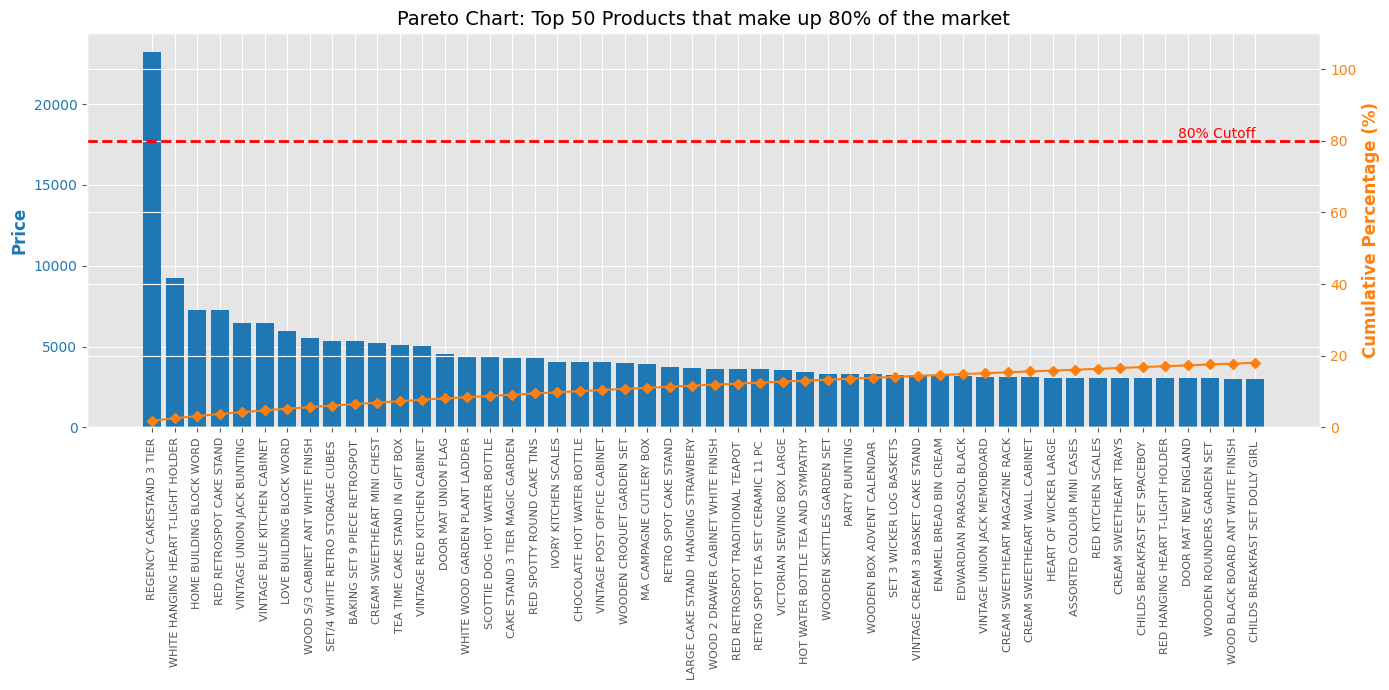

In [58]:
from matplotlib.ticker import PercentFormatter

df_pareto = df_pareto.sort_values(by='Price', ascending=False)

# Count cumperc
df_pareto['cumperc'] = df_pareto['Price'].cumsum() / df_pareto['Price'].sum() * 100

top_n = 50
plot_data = df_pareto.head(top_n)

fig, ax = plt.subplots(figsize=(14, 7))

# create Bar Chart
ax.bar(plot_data['Description'], plot_data['Price'], color='tab:blue')
ax.set_ylabel('Price', color='tab:blue', fontweight='bold')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.set_xticklabels(plot_data['Description'], rotation=90, fontsize=8) # Putar label agar terbaca

# createLine Chart
ax2 = ax.twinx()
ax2.plot(plot_data['Description'], plot_data['cumperc'], color='tab:orange', marker='D', ms=5)
ax2.set_ylabel('Cumulative Percentage (%)', color='tab:orange', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylim(0, 110)

# pereto line
ax2.axhline(80, color='red', linestyle='--', linewidth=2)
ax2.text(len(plot_data)-1, 80, '80% Cutoff', color='red', va='bottom', ha='right')

plt.title(f'Pareto Chart: Top {top_n} Products that make up 80% of the market', fontsize=14)
plt.tight_layout()
plt.show()

* This graph shows top 50 of products that contribute to 80% revenue.While the rest of products have a relatively small contribution
* This indicates that revenue is concentrated in specific products that drive primary income. As a result, if stock levels are low, prices change, or demand decreases, operational disruptions may arise.
* Many products with low revenue contribution still incur inventory, storage, and operational costs, but do not yield comparable returns.

In [59]:
df_filtered=df[~df['StockCode'].isin(non_product_codes)].copy()


fig = px.scatter(df_filtered, x='Quantity', y='Price',
                 color='Quantity',
                 title='Scatter Plot of Quantity vs Price by Quantity',
                 labels={'Quantity': 'Product Quantity', 'Price': 'Product Price'})

fig.update_layout(
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()

* The majority of transactions occured in low quantities with relatively low product prices.
* Customers preferred to buy product in low quantity or because impulsive purchase.
* Focus on pricing strategy for products with low-price high-frequency.  

---
* Transactions with high quantity barely occured in low price. Because for stock, event, or reseller needs.
* Products with high value barely occured in low quantity. Due to risk and consider value.
* Apply tiered pricing on products with low price to maximize the profit.

In [60]:
df_filtered[df_filtered['Quantity']== 19152]

Invoice StockCode                         Description  Quantity  \
90857  497946     37410  BLACK AND WHITE PAISLEY FLOWER MUG     19152   

              InvoiceDate  Price  Customer ID  Country Transaction type  \
90857 2010-02-15 11:57:00    0.1      13902.0  Denmark             Sale   

       Total price        date     month    week time  year  
90857       1915.2  2010-02-15  February  Monday   11  2010

In [61]:
df_products = df_filtered[df_filtered['Transaction type'] != 'free'].copy()

# Calculate total quantity sold for each product
total_sold_quantity = df_products[df_products['Quantity'] > 0].groupby('Description')['Quantity'].sum().reset_index()
total_sold_quantity.rename(columns={'Quantity': 'TotalSoldQuantity'}, inplace=True)

# Calculate total quantity returned for each product
total_returned_quantity = df_products[df_products['Quantity'] < 0].groupby('Description')['Quantity'].sum().reset_index()
total_returned_quantity['Quantity'] = total_returned_quantity['Quantity'].abs() #make it abs value
total_returned_quantity.rename(columns={'Quantity': 'TotalReturnedQuantity'}, inplace=True)

# merge the df
product_summary = pd.merge(total_sold_quantity, total_returned_quantity, on='Description', how='left').fillna(0)

# Calculate return rate
product_summary['ReturnRate'] = (product_summary['TotalReturnedQuantity'] / product_summary['TotalSoldQuantity']) * 100

display(product_summary.sort_values(by='ReturnRate', ascending=False).head(10))

Description  TotalSoldQuantity  \
4270   WHITE SCANDINAVIAN HEART CHRISTMAS                  1   
1414                 FEATHER HEART LIGHTS                  1   
3138           RED HEART CANDY POP LIGHTS                  1   
3734                 SILVER CHERRY LIGHTS                 59   
828       CERAMIC CAKE TEAPOT WITH CHERRY                  1   
1043        CREAM SWEETHEART DOUBLE SHELF                  3   
4057  TREE OF NOAH FESTIVE SCENTED CANDLE                 62   
1350      ENGLISH ROSE SET/3 GARDEN TOOLS                  3   
2092  KISS REINDEER SCANDINAVIAN STOCKING                  5   
4227                  WHITE CHERRY LIGHTS                962   

      TotalReturnedQuantity   ReturnRate  
4270                   12.0  1200.000000  
1414                    9.0   900.000000  
3138                    3.0   300.000000  
3734                  155.0   262.711864  
828                     2.0   200.000000  
1043                    6.0   200.000000  
4057                   96.0   154.838710  
1350                    4.0   133.333333  
2092                    6.0   120.000000  
4227                 1059.0   110.083160

In [62]:

top_10_returned_products = product_summary.sort_values(by='ReturnRate', ascending=False).head(10)


fig = px.bar(top_10_returned_products,
             x='Description',
             y='ReturnRate',
             color='Description',
             title='Top 10 Products with Highest Return Rates',
             labels={'Description': 'Product Description', 'ReturnRate': 'Return Rate (%)'})

fig.update_layout(
    xaxis_title="Product Description",
    yaxis_title="Return Rate (%)",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()

* This visualization shows about top 10 most returned products.
* Decorative products are more likely to be returned.
* Improve the product descriptions about size, material, and usage.
* Add more realistic and multi-angle product photos.
* Stop doing aggresive promo on products with ekstrem returns.
* Combine high-risk products into bundles with stable products to reduce individual returns.

#MBA

In [63]:
from mlxtend.frequent_patterns import fpmax
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
# Data Processing
from mlxtend.preprocessing import TransactionEncoder
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [64]:
df_mba= df_filtered.copy()
df_mba= df_mba[~df_mba['Invoice'].astype(str).str.contains('C')]
df_mba= df_mba[df_mba['Country']=='United Kingdom']
df_mba

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  \
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom   
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom   
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom   
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom   
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom   
...                    ...    ...          ...             ...   
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom   
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom   
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom   
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom   
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom   

       Transaction type  Total price        date     month      week time  \
0                  Sale        83.40  2009-12-01  December   Tuesday   07   
1                  Sale        81.00  2009-12-01  December   Tuesday   07   
2                  Sale        81.00  2009-12-01  December   Tuesday   07   
3                  Sale       100.80  2009-12-01  December   Tuesday   07   
4                  Sale        30.00  2009-12-01  December   Tuesday   07   
...                 ...          ...         ...       ...       ...  ...   
525456             Sale         5.90  2010-12-09  December  Thursday   20   
525457             Sale         3.75  2010-12-09  December  Thursday   20   
525458             Sale         3.75  2010-12-09  December  Thursday   20   
525459             Sale         7.50  2010-12-09  December  Thursday   20   
525460             Sale         3.90  2010-12-09  December  Thursday   20   

        year  
0       2009  
1       2009  
2       2009  
3       2009  
4       2009  
...      ...  
525456  2010  
525457  2010  
525458  2010  
525459  2010  
525460  2010  

[370474 rows x 15 columns]

In [65]:
transactions_df = df_mba.groupby('Invoice')['Description'].apply(list).tolist()

encoder = TransactionEncoder()
# Fit dan Transform data yang sudah berupa list of lists
transaction_matrix = encoder.fit(transactions_df).transform(transactions_df)

df_encoded = pd.DataFrame(transaction_matrix, columns=encoder.columns_)
df_encoded.head()

DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
0                                False                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                False                      False   

    4 PURPLE FLOCK DINNER CANDLES   ANIMAL STICKERS  \
0                           False             False   
1                           False             False   
2                           False             False   
3                           False             False   
4                           False             False   

    BLACK PIRATE TREASURE CHEST   BROWN  PIRATE TREASURE CHEST   \
0                         False                           False   
1                         False                           False   
2                         False                           False   
3                         False                           False   
4                         False                           False   

    CAMPHOR WOOD PORTOBELLO MUSHROOM   CHERRY BLOSSOM  DECORATIVE FLASK  \
0                              False                              False   
1                              False                              False   
2                              False                              False   
3                              False                              False   
4                              False                              False   

    FAIRY CAKE CANDLES   FLAMINGO LIGHTS  ...  \
0                False             False  ...   
1                False             False  ...   
2                False             False  ...   
3                False             False  ...   
4                False             False  ...   

   ZINC HEART LATTICE CHARGER LARGE  ZINC HEART LATTICE CHARGER SMALL  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   ZINC HEART LATTICE DOUBLE PLANTER  ZINC HEART LATTICE PLANTER BOWL  \
0                              False                            False   
1                              False                            False   
2                              False                            False   
3                              False                            False   
4                              False                            False   

   ZINC HEART LATTICE T-LIGHT HOLDER  ZINC HEART LATTICE TRAY OVAL   \
0                              False                          False   
1                              False                          False   
2                              False                          False   
3                              False                          False   
4                              False                          False   

   ZINC METAL HEART DECORATION  ZINC POLICE BOX LANTERN  \
0                        False                    False   
1                        False                    False   
2                        False                    False   
3                        False                    False   
4                        False                    False   

   ZINC TOP  2 DOOR WOODEN SHELF   ZINC WILLIE WINKIE  CANDLE STICK  
0                           False                             False  
1                           False                             False  
2                           False                             False  
3                           False                             False  
4                           False                             False  

[5 rows x 4403 columns]

In [66]:
n_rows, n_items = df_encoded.shape

print(f"No. of Samples  : {n_rows}")
print(f"No. of Products : {n_items}")

No. of Samples  : 17497
No. of Products : 4403


In [67]:
# Computing the minimum support threshold
minimum_support_threshold = round((30/n_rows) * 5, 5)

print(f"Minimum Support Threshold: {minimum_support_threshold}")

Minimum Support Threshold: 0.00857


Let's consider that we are looking for item sets that occur at least 5 times a day. Now, considering that we have a data of 30 days and including 17497 transactions.

In [68]:
freq_itemsets = fpgrowth(
    df_encoded,
    min_support=minimum_support_threshold,
    use_colnames=True
)


In [69]:
freq_itemsets.sort_values('support', ascending=False).head()

support                              itemsets
39   0.166886  (WHITE HANGING HEART T-LIGHT HOLDER)
539  0.086529            (REGENCY CAKESTAND 3 TIER)
6    0.072012       (ASSORTED COLOUR BIRD ORNAMENT)
0    0.070755      (STRAWBERRY CERAMIC TRINKET BOX)
7    0.064983            (HOME BUILDING BLOCK WORD)

In [70]:
print(freq_itemsets.shape)

(1131, 2)


In [71]:
# metric lift > 1, shows a strong relationship
rules = association_rules(freq_itemsets, metric="lift", min_threshold=1)

# sort by lift and confidence
rules_sorted = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

antecedents  \
954                          (CHILDS GARDEN FORK BLUE )   
955                        (CHILDS GARDEN TROWEL BLUE )   
951                           (CHILDS GARDEN FORK PINK)   
950                         (CHILDS GARDEN TROWEL PINK)   
949                        (CHILDS GARDEN TROWEL BLUE )   
948                         (CHILDS GARDEN TROWEL PINK)   
953                           (CHILDS GARDEN FORK PINK)   
952                        (CHILDS GARDEN TROWEL BLUE )   
1025                    (POPPY'S PLAYHOUSE LIVINGROOM )   
1024  (POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...   

                                            consequents   support  confidence  \
954                        (CHILDS GARDEN TROWEL BLUE )  0.009202    0.936047   
955                          (CHILDS GARDEN FORK BLUE )  0.009202    0.800995   
951                         (CHILDS GARDEN TROWEL PINK)  0.009773    0.934426   
950                           (CHILDS GARDEN FORK PINK)  0.009773    0.818182   
949                         (CHILDS GARDEN TROWEL PINK)  0.010002    0.870647   
948                        (CHILDS GARDEN TROWEL BLUE )  0.010002    0.837321   
953                        (CHILDS GARDEN TROWEL BLUE )  0.008687    0.830601   
952                           (CHILDS GARDEN FORK PINK)  0.008687    0.756219   
1025  (POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...  0.009487    0.813725   
1024                    (POPPY'S PLAYHOUSE LIVINGROOM )  0.009487    0.764977   

           lift  
954   81.482616  
955   81.482616  
951   78.228018  
950   78.228018  
949   72.888548  
948   72.888548  
953   72.303619  
952   72.303619  
1025  65.611774  
1024  65.611774

In [75]:
rules_sorted

antecedents  \
954            (CHILDS GARDEN FORK BLUE )   
955          (CHILDS GARDEN TROWEL BLUE )   
951             (CHILDS GARDEN FORK PINK)   
950           (CHILDS GARDEN TROWEL PINK)   
949          (CHILDS GARDEN TROWEL BLUE )   
..                                    ...   
115  (WHITE HANGING HEART T-LIGHT HOLDER)   
984             (JUMBO BAG RED RETROSPOT)   
985  (WHITE HANGING HEART T-LIGHT HOLDER)   
762   (JUMBO SHOPPER VINTAGE RED PAISLEY)   
763  (WHITE HANGING HEART T-LIGHT HOLDER)   

                              consequents  antecedent support  \
954          (CHILDS GARDEN TROWEL BLUE )            0.009830   
955            (CHILDS GARDEN FORK BLUE )            0.011488   
951           (CHILDS GARDEN TROWEL PINK)            0.010459   
950             (CHILDS GARDEN FORK PINK)            0.011945   
949           (CHILDS GARDEN TROWEL PINK)            0.011488   
..                                    ...                 ...   
115     (PAPER CHAIN KIT 50'S CHRISTMAS )            0.166886   
984  (WHITE HANGING HEART T-LIGHT HOLDER)            0.056524   
985             (JUMBO BAG RED RETROSPOT)            0.166886   
762  (WHITE HANGING HEART T-LIGHT HOLDER)            0.050294   
763   (JUMBO SHOPPER VINTAGE RED PAISLEY)            0.166886   

     consequent support   support  confidence       lift  representativity  \
954            0.011488  0.009202    0.936047  81.482616               1.0   
955            0.009830  0.009202    0.800995  81.482616               1.0   
951            0.011945  0.009773    0.934426  78.228018               1.0   
950            0.010459  0.009773    0.818182  78.228018               1.0   
949            0.011945  0.010002    0.870647  72.888548               1.0   
..                  ...       ...         ...        ...               ...   
115            0.044179  0.008744    0.052397   1.186022               1.0   
984            0.166886  0.010973    0.194135   1.163284               1.0   
985            0.056524  0.010973    0.065753   1.163284               1.0   
762            0.166886  0.008687    0.172727   1.035003               1.0   
763            0.050294  0.008687    0.052055   1.035003               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
954  0.009089   15.456738       0.997533  0.759434   0.935303    0.868521  
955  0.009089    4.975603       0.999206  0.759434   0.799019    0.868521  
951  0.009648   15.067840       0.997651  0.773756   0.933633    0.876304  
950  0.009648    5.442476       0.999152  0.773756   0.816260    0.876304  
949  0.009864    7.638426       0.997742  0.744681   0.869083    0.853984  
..        ...         ...            ...       ...        ...         ...  
115  0.001372    1.008673       0.188264  0.043220   0.008598    0.125164  
984  0.001540    1.033814       0.148774  0.051655   0.032708    0.129944  
985  0.001540    1.009879       0.168482  0.051655   0.009782    0.129944  
762  0.000294    1.007061       0.035610  0.041667   0.007012    0.112391  
763  0.000294    1.001857       0.040594  0.041667   0.001854    0.112391  

[1042 rows x 14 columns]

In [72]:
rules_filtered = rules[
    (rules['lift'] > 5) &
    (rules['confidence'] > 0.7) &
    (rules['support'] > 0.005)
]

rules_filtered = rules_filtered.sort_values(['lift', 'confidence'], ascending=[False, False])

rules_filtered

antecedents  \
954                         (CHILDS GARDEN FORK BLUE )   
955                       (CHILDS GARDEN TROWEL BLUE )   
951                          (CHILDS GARDEN FORK PINK)   
950                        (CHILDS GARDEN TROWEL PINK)   
949                       (CHILDS GARDEN TROWEL BLUE )   
..                                                 ...   
653  (PACK OF 72 SKULL CAKE CASES, PACK OF 60 DINOS...   
647  (PACK OF 72 RETRO SPOT CAKE CASES, PACK OF 60 ...   
364  (SWEETHEART CERAMIC TRINKET BOX, WHITE HANGING...   
360                   (SWEETHEART CERAMIC TRINKET BOX)   
464                     (PAINTED METAL PEARS ASSORTED)   

                          consequents  antecedent support  consequent support  \
954      (CHILDS GARDEN TROWEL BLUE )            0.009830            0.011488   
955        (CHILDS GARDEN FORK BLUE )            0.011488            0.009830   
951       (CHILDS GARDEN TROWEL PINK)            0.010459            0.011945   
950         (CHILDS GARDEN FORK PINK)            0.011945            0.010459   
949       (CHILDS GARDEN TROWEL PINK)            0.011488            0.011945   
..                                ...                 ...                 ...   
653     (60 TEATIME FAIRY CAKE CASES)            0.012688            0.058410   
647     (60 TEATIME FAIRY CAKE CASES)            0.014060            0.058410   
364  (STRAWBERRY CERAMIC TRINKET BOX)            0.011659            0.070755   
360  (STRAWBERRY CERAMIC TRINKET BOX)            0.043665            0.070755   
464   (ASSORTED COLOUR BIRD ORNAMENT)            0.020403            0.072012   

      support  confidence       lift  representativity  leverage  conviction  \
954  0.009202    0.936047  81.482616               1.0  0.009089   15.456738   
955  0.009202    0.800995  81.482616               1.0  0.009089    4.975603   
951  0.009773    0.934426  78.228018               1.0  0.009648   15.067840   
950  0.009773    0.818182  78.228018               1.0  0.009648    5.442476   
949  0.010002    0.870647  72.888548               1.0  0.009864    7.638426   
..        ...         ...        ...               ...       ...         ...   
653  0.009087    0.716216  12.261874               1.0  0.008346    3.317984   
647  0.009887    0.703252  12.039923               1.0  0.009066    3.173029   
364  0.009259    0.794118  11.223487               1.0  0.008434    4.513476   
360  0.033320    0.763089  10.784950               1.0  0.030231    3.922338   
464  0.015260    0.747899  10.385708               1.0  0.013790    3.681018   

     zhangs_metric   jaccard  certainty  kulczynski  
954       0.997533  0.759434   0.935303    0.868521  
955       0.999206  0.759434   0.799019    0.868521  
951       0.997651  0.773756   0.933633    0.876304  
950       0.999152  0.773756   0.816260    0.876304  
949       0.997742  0.744681   0.869083    0.853984  
..             ...       ...        ...         ...  
653       0.930249  0.146544   0.698612    0.435897  
647       0.930019  0.157991   0.684844    0.436264  
364       0.921647  0.126562   0.778441    0.462487  
360       0.948703  0.410853   0.745050    0.617005  
464       0.922537  0.197778   0.728336    0.479902  

[69 rows x 14 columns]

* Products that exhibit complementary characteristics tend to be purchased together with greater frequency. These items inherently form a natural bundling pattern.
* Additionally, products that possess visual and thematic harmony are often bought in conjunction with one another.

* We can create bundles of complementary products that are commonly purchased together.
* It is advisable to utilize a bundle title that accurately reflects the functional purpose of the products.
* Consider implementing light bundling techniques.
* Prioritize recommendations that share similar colors, functions, and themes.
* Present recommendations in a format labeled "Frequently Bought Together" to enhance visibility.

In [73]:
top_rules = (
    rules_filtered
    .sort_values("lift", ascending=False)
    .head(25)
)

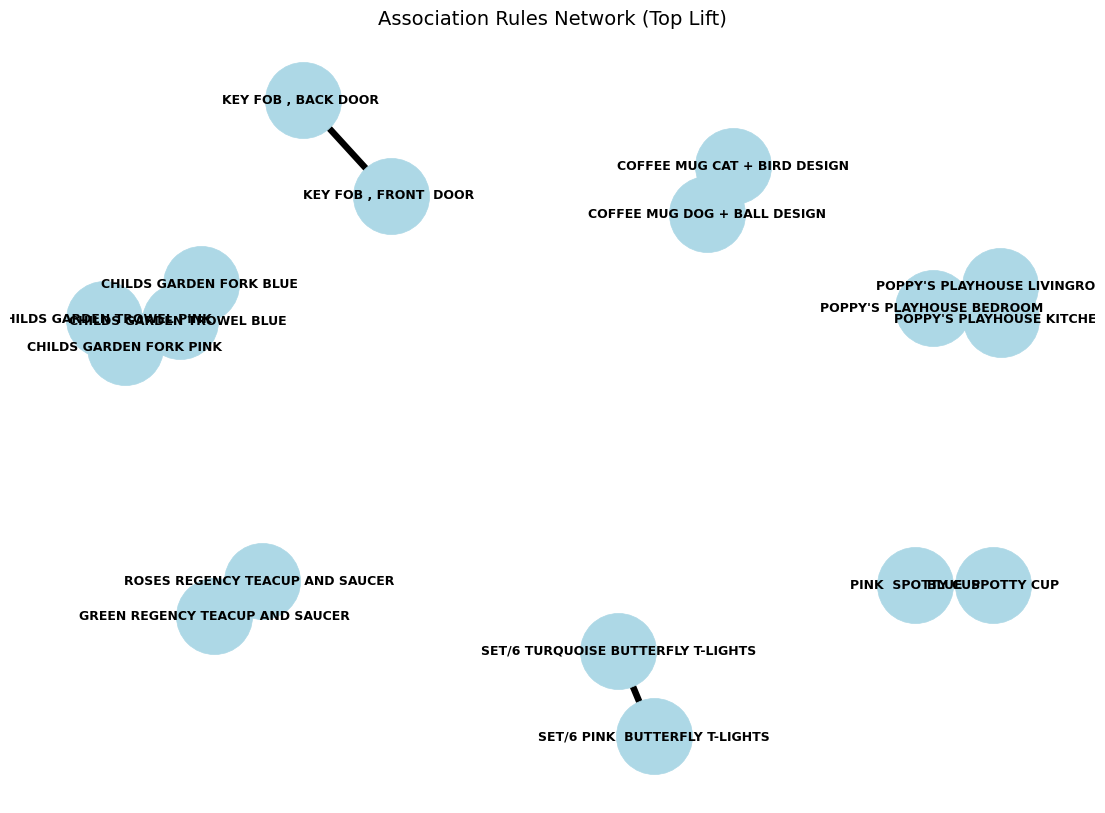

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # directed graph (A → B)

for _, row in top_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]

    G.add_edge(
        antecedent,
        consequent,
        weight=row['lift'],
        confidence=row['confidence']
    )
pos = nx.spring_layout(G, k=1.2, seed=42)

plt.figure(figsize=(14, 10))

# node
nx.draw_networkx_nodes(
    G, pos,
    node_size=3000,
    node_color="lightblue"
)

# edge
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='->',
    arrowsize=15,
    width=[w/10 for w in weights]  # lift → ketebalan
)

# label
nx.draw_networkx_labels(
    G, pos,
    font_size=9,
    font_weight="bold"
)

plt.title("Association Rules Network (Top Lift)", fontsize=14)
plt.axis("off")
plt.show()

